<a href="https://colab.research.google.com/github/vcorredorg/SenalesySistemas2025/blob/main/Taller1/c_Discretizaci%C3%B3n_de_Se%C3%B1ales1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Discretización de señales

In [ ]:
#Librerías
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

Se pretende muestrear la señal

$$x(t) = 10\cos(\omega t)$$

con

$$\omega = 2\pi F, \quad F = 50~\text{Hz}$$

Se emplea un sistema de discretización con frecuencia de muestreo

$$F_s = 80~\text{Hz}$$

Demuestre si el sistema utilizado es apropiado para la señal \(x(t)\) y estime la señal capturada.  


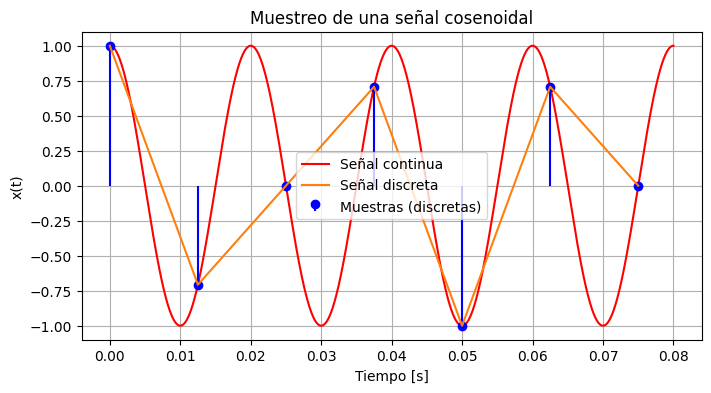

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1
F = 50            # Frecuencia de la señal [Hz]
T=1/F
w = 2 * np.pi * F
Fs = 80           # Frecuencia de muestreo [Hz]
Ts = 1 / Fs

# Tiempos
t = np.linspace(0, 4*T, 1000)   # Tiempo continuo
ts = np.arange(0, 4*T, Ts)      # Instantes de muestreo

# Señales
xt = A * np.cos(w * t)        # Señal continua
xs = A * np.cos(w * ts)       # Señal discreta

# Gráfica
plt.figure(figsize=(8,4))
plt.plot(t, xt, 'r', label='Señal continua')
plt.stem(ts, xs, basefmt=" ", linefmt='b', markerfmt='bo', label='Muestras (discretas)')
plt.plot(ts,xs, label='Señal discreta')
plt.xlabel('Tiempo [s]')
plt.ylabel('x(t)')
plt.title('Muestreo de una señal cosenoidal')
plt.legend()
plt.grid(True)
plt.show()


La señal no cumple con Nyquist, ya que la frecuencia de muestreo (Fs) debe ser mayor o igual a dos veces la frecuencia de la señal (Fo).

Se tiene un microprocesador de 4 bits con entrada análoga entre

$$-3.3~\text{V} \text{ y } 3.3~\text{V}.$$

Describa las condiciones necesarias para que el microprocesador pueda digitalizar la señal

$$x(t) = 30\cos(100t)$$

Presente una simulación en Python de dicho proceso para tres ciclos de la señal \(x(t)\).


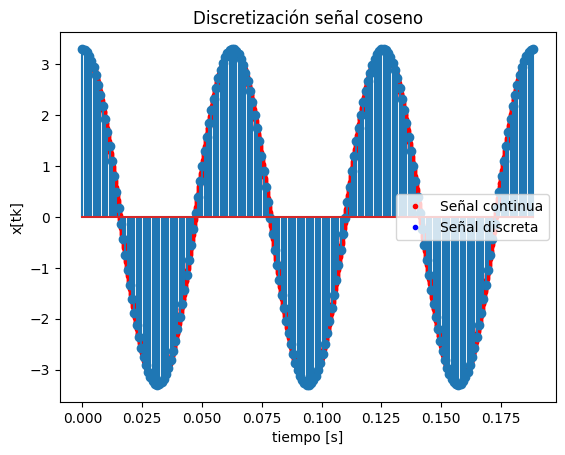

In [ ]:
#parametros de la señal
K = 200         # número de muestras
A = 30         # Amplitud original [V]
w = 100        # Frecuencia angular [rad/s]
F0 = w / (2*np.pi)  # Frecuencia de la señal[Hz]
T0=1/F0        # Periodo de la señal [s]

#Tiempos
ti = 0
tf = 3*T0                      # 3 periodos
tv = np.linspace(ti, tf, 3000) #Continuo
ts= np.linspace(ti, tf, K)     #Discreto
Ts = (tf - ti)/K

#Funcion
xv= A*np.cos(w*tv) #continua
xs= A*np.cos(w*ts) #discreta

#Cero y pendiente
def my_ceropen(x,ymin , ymax ):
  xmax = max(x)
  xmin = min(x)
  m = (ymax - ymin)/(xmax - xmin)
  b = ymin - m*xmin
  yv = m*x + b
  return yv

yv = my_ceropen(xv,-3.3,3.3)
ys= my_ceropen(xs,-3.3,3.3)

plt.title("Discretización señal coseno")
plt.plot(tv,yv,'r.',label='Señal continua')
plt.plot(ts,ys,'b.',label='Señal discreta')
plt.stem(ts,ys)
plt.xlabel('tiempo [s]')
plt.ylabel('x[tk]')
plt.legend()
plt.show() #mostrar gráfica

Se tiene un sistema de discretización con frecuencia de muestreo

$$F_s = 40~\text{Hz},$$

aplicado a las señales

$$x_1(t) = \cos(20t) \quad \text{y} \quad x_2(t) = \cos(100t)$$

¿Las versiones discretizadas de las señales son distinguibles entre sí?

Implemente una simulación en Python del proceso de discretización.


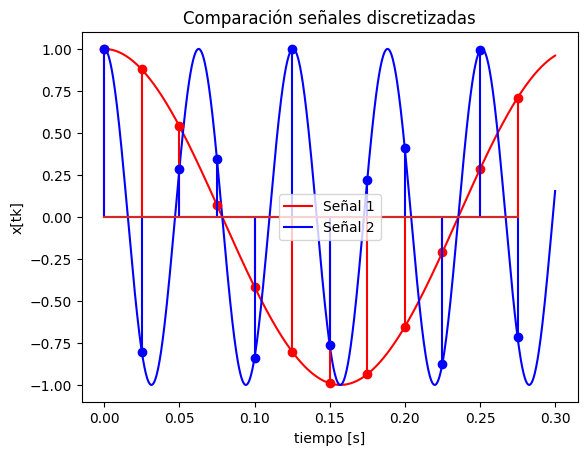

In [ ]:
#Parámetros
Fs = 40
A=1
w1=20
w2=100

#Tiempos
t= np.linspace(0, 0.3, 1000)
ts= np.arange(0, 0.3, 1/Fs)

#Señales continuas
x1= A*np.cos(w1*t)
x2= A*np.cos(w2*t)

#Señales dicretas
xs1= A*np.cos(w1*ts)
xs2= A*np.cos(w2*ts)

plt.title("Comparación señales discretizadas")
plt.plot(t,x1,'r',label='Señal 1')
plt.plot(t, x2,'b', label='Señal 2')
plt.stem(ts,xs1, 'r')
plt.stem(ts,xs2, 'b')
plt.xlabel('tiempo [s]')
plt.ylabel('x[tk]')
plt.legend()
plt.show()

Demuestre que funciones cosenoidales con frecuencia de oscilación

$$F_k = F_0 + kF_s, \quad k \in \mathbb{Z},$$

no son distinguibles de la función

$$\cos(2\pi F_0 t)$$

al utilizar un sistema de discretización con frecuencia de muestreo

$$F_s.$$

Realice simulaciones para

$$k = 0, 1, 2, 3.$$


<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-3532768652.py:31: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Comparación de señales $\cos(2\\pi F_k t)$ muestreadas con $F_s$ (k=0..3)')


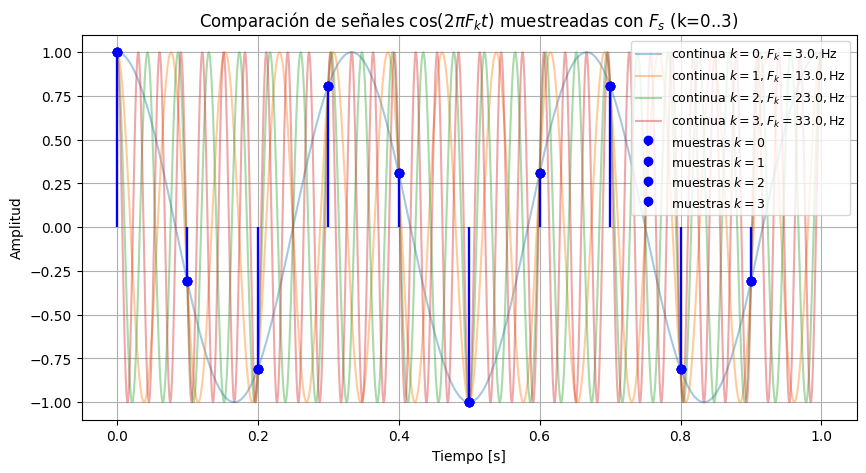

In [ ]:
# Parámetros
F0 = 3.0      # Frecuencia base F0 [Hz]
Fs = 10.0     # Frecuencia de muestreo Fs [Hz]
ks = [0,1,2,3]   # valores de k a simular

# Duración: simular 3 ciclos de la señal de frecuencia F0
T0 = 1/ F0
t_final = 3 * T0

# Tiempo continuo y de muestreo
t = np.linspace(0, t_final, 2000)        # tiempo continuo (denso)
ts = np.arange(0, t_final, 1/Fs) #discreto

# Preparar la figura
plt.figure(figsize=(10,5))
colors = ['C0','C1','C2','C3']

# Graficar cada Fk: señal continua y sus muestras
for idx, k in enumerate(ks):
    Fk = F0 + k*Fs
    x_cont = np.cos(2*np.pi*Fk*t)
    x_samp = np.cos(2*np.pi*Fk*ts)

    # Señal continua (línea más tenue para no saturar)
    plt.plot(t, x_cont, alpha=0.4, label=f'continua $k={k}, F_k={Fk:.1f},$Hz', color=colors[idx])
    # Muestras
    plt.stem(ts, x_samp, basefmt=" ", linefmt='b',label=f'muestras $k={k}$')

plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Comparación de señales $\cos(2\\pi F_k t)$ muestreadas con $F_s$ (k=0..3)')
plt.grid(True)
plt.legend(loc='upper right', fontsize=9)
plt.show()
